# Processing DF

In [63]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv(r"C:/Users/tzolz/Desktop/PythonforDA/APP/Data/clean_df.csv")
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,1,1,0,0


In [64]:
# X contains 12 parameters
# y contain only alcohol for this test
X = df.drop(df.columns[12:31], axis=1) 
y = df["Alcohol"]

X.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


##### 0 correspond to "Never Used", "Used over a Decade Ago" and 1 correspond to all other classes

In [65]:
sum_of_zeros = (y == 0).sum()
sum_of_ones = (y == 1).sum()

print(f'sum of zero : {sum_of_zeros} \nsum of ones : {sum_of_ones}')

sum of zero : 68 
sum of ones : 1817


In [66]:
X.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


# Logistic regression

In [67]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def logisticregression(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the logistic regression model
    model = LogisticRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)


drugs = [
            'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate',
            'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
            'Mushrooms', 'Nicotine', 'Semer', 'VSA'
        ]
logisticaccuracies = {}

for drug in drugs:
    y = df[drug]
    logisticaccuracies[drug] = logisticregression(X, y)

logisticaccuracies


{'Alcohol': 0.9628647214854111,
 'Amphet': 0.713527851458886,
 'Amyl': 0.8090185676392573,
 'Benzos': 0.726790450928382,
 'Caffeine': 0.9787798408488063,
 'Cannabis': 0.8143236074270557,
 'Chocolate': 0.9893899204244032,
 'Coke': 0.7029177718832891,
 'Crack': 0.9071618037135278,
 'Ecstasy': 0.7347480106100795,
 'Heroin': 0.883289124668435,
 'Ketamine': 0.8249336870026526,
 'Legalh': 0.7931034482758621,
 'LSD': 0.7851458885941645,
 'Meth': 0.7745358090185677,
 'Mushrooms': 0.7453580901856764,
 'Nicotine': 0.7161803713527851,
 'Semer': 0.9973474801061007,
 'VSA': 0.8726790450928382}

# KNN Neighbors

In [69]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knnmodel(X,y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a KNN classifier with k=3
    knn_classifier = KNeighborsClassifier(n_neighbors=3)

    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    return accuracy_score(y_test, y_pred)

    

drugs = [
            'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate',
            'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
            'Mushrooms', 'Nicotine', 'Semer', 'VSA'
        ]
knnaccuracies = {}

for drug in drugs:
    y = df[drug]
    knnaccuracies[drug] = knnmodel(X, y)

knnaccuracies


{'Alcohol': 0.9602122015915119,
 'Amphet': 0.7214854111405835,
 'Amyl': 0.7639257294429708,
 'Benzos': 0.6657824933687002,
 'Caffeine': 0.9761273209549072,
 'Cannabis': 0.7745358090185677,
 'Chocolate': 0.9893899204244032,
 'Coke': 0.6896551724137931,
 'Crack': 0.8753315649867374,
 'Ecstasy': 0.7055702917771883,
 'Heroin': 0.8514588859416445,
 'Ketamine': 0.7612732095490716,
 'Legalh': 0.7374005305039788,
 'LSD': 0.7400530503978779,
 'Meth': 0.76657824933687,
 'Mushrooms': 0.6976127320954907,
 'Nicotine': 0.6684350132625995,
 'Semer': 0.9973474801061007,
 'VSA': 0.843501326259947}

# Random Forest Classification

In [70]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def RandomForestmodel(X, y):
    #Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest classifier with 100 trees
    random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier on the training data
    random_forest_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = random_forest_classifier.predict(X_test)

    return accuracy_score(y_test, y_pred)

    
drugs = [
            'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate',
            'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
            'Mushrooms', 'Nicotine', 'Semer', 'VSA'
        ]
RFaccuracies = {}

for drug in drugs:
    y = df[drug]
    RFaccuracies[drug] = RandomForestmodel(X, y)

RFaccuracies


{'Alcohol': 0.9628647214854111,
 'Amphet': 0.7108753315649867,
 'Amyl': 0.8143236074270557,
 'Benzos': 0.6949602122015915,
 'Caffeine': 0.9787798408488063,
 'Cannabis': 0.8010610079575596,
 'Chocolate': 0.9893899204244032,
 'Coke': 0.6923076923076923,
 'Crack': 0.9071618037135278,
 'Ecstasy': 0.726790450928382,
 'Heroin': 0.883289124668435,
 'Ketamine': 0.8222811671087533,
 'Legalh': 0.7877984084880637,
 'LSD': 0.7798408488063661,
 'Meth': 0.7612732095490716,
 'Mushrooms': 0.7241379310344828,
 'Nicotine': 0.7320954907161804,
 'Semer': 0.9973474801061007,
 'VSA': 0.8567639257294429}

# SVM Classification

In [78]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def SVMclassification(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an SVM classifier
    svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

    # Train the classifier on the training data
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = svm_classifier.predict(X_test)

    # Evaluate the accuracy of the model
    return accuracy_score(y_test, y_pred)


drugs = [
            'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate',
            'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
            'Mushrooms', 'Nicotine', 'Semer', 'VSA'
        ]
SVMaccuracies = {}

for drug in drugs:
    y = df[drug]
    SVMaccuracies[drug] = SVMclassification(X, y)

SVMaccuracies

{'Alcohol': 0.9628647214854111,
 'Amphet': 0.7082228116710876,
 'Amyl': 0.8116710875331565,
 'Benzos': 0.6896551724137931,
 'Caffeine': 0.9787798408488063,
 'Cannabis': 0.8116710875331565,
 'Chocolate': 0.9893899204244032,
 'Coke': 0.7029177718832891,
 'Crack': 0.9071618037135278,
 'Ecstasy': 0.7427055702917772,
 'Heroin': 0.8885941644562334,
 'Ketamine': 0.8275862068965517,
 'Legalh': 0.7957559681697612,
 'LSD': 0.7745358090185677,
 'Meth': 0.7718832891246684,
 'Mushrooms': 0.7639257294429708,
 'Nicotine': 0.7161803713527851,
 'Semer': 0.9973474801061007,
 'VSA': 0.870026525198939}

# Plot accuracy

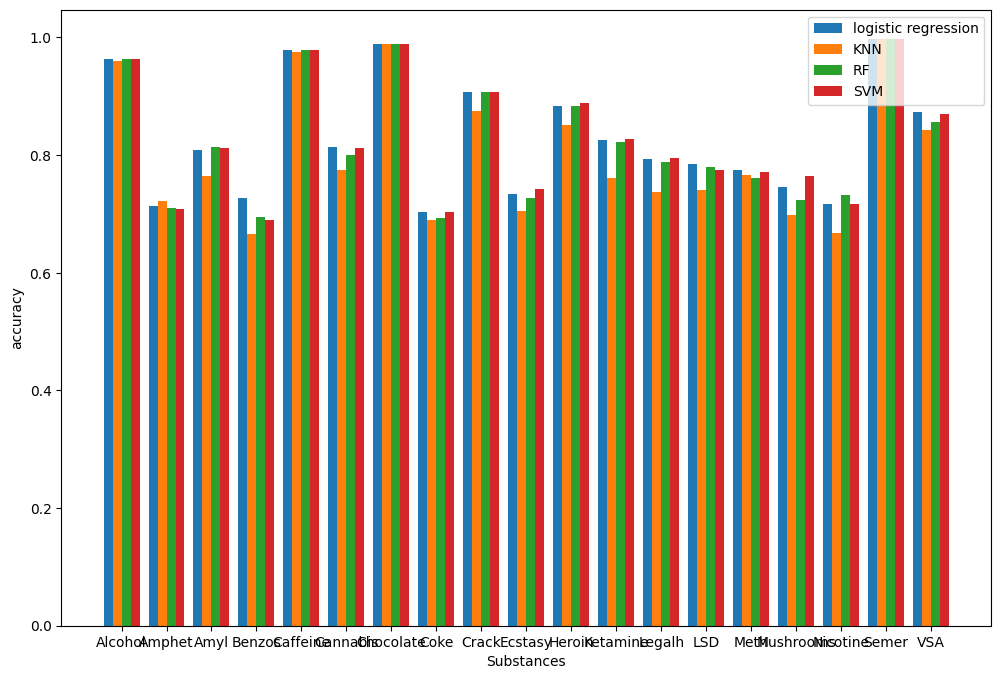

In [79]:
import matplotlib.pyplot as plt
import numpy as np

data_dicts = [logisticaccuracies, knnaccuracies, RFaccuracies, SVMaccuracies]
labels = ['logistic regression', 'KNN', 'RF', 'SVM']

# Extract the keys and values from each dictionary
categories = list(data_dicts[0].keys())
values = np.array([list(d.values()) for d in data_dicts])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2
bar_positions = np.arange(len(categories))

for i, data_dict in enumerate(data_dicts):
    ax.bar(bar_positions + i * bar_width, list(data_dict.values()), width=bar_width, label=f'Data {i+1}')

ax.set_xticks(bar_positions + (len(data_dicts) - 1) * bar_width / 2)
ax.set_xticklabels(categories)
ax.set_xlabel('Substances')
ax.set_ylabel('accuracy')
ax.legend(labels)

plt.show()

In [80]:
# We will use logistic regression

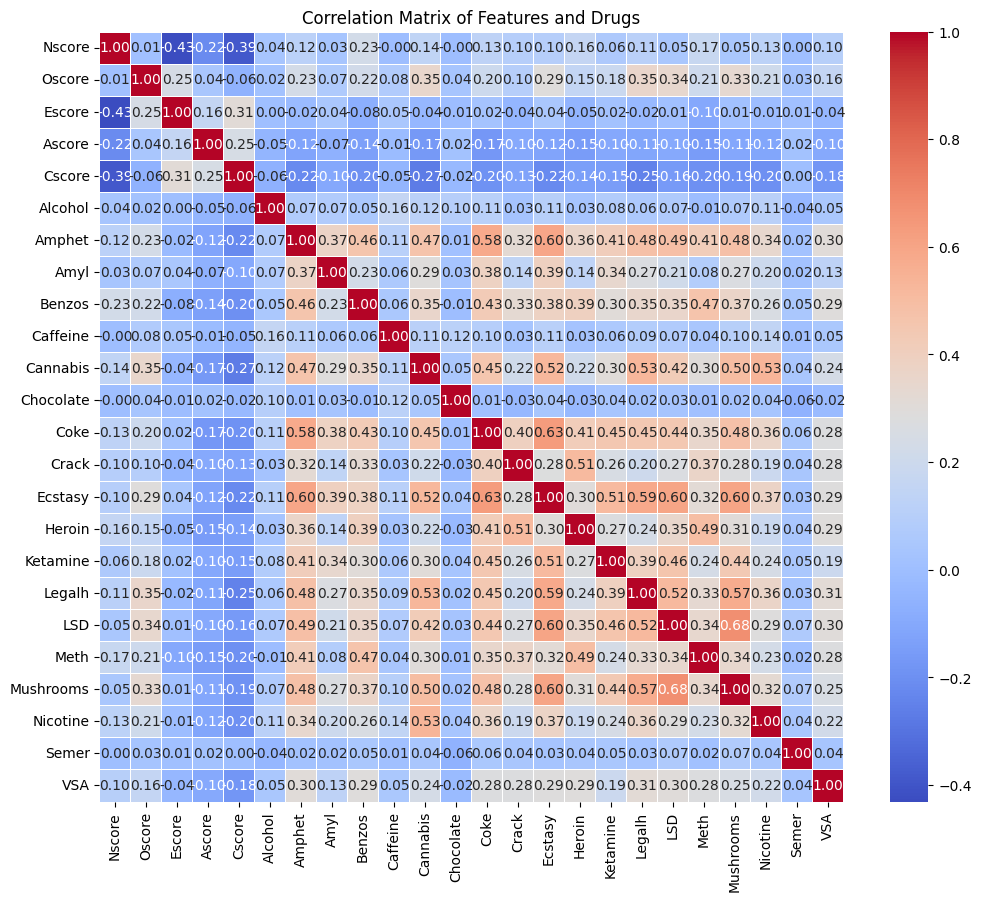

In [82]:
import seaborn as sns

features = ['Nscore', 'Oscore', 'Escore', 'Ascore', 'Cscore']
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Extract the relevant columns from the DataFrame
selected_columns = features + drugs
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features and Drugs')
plt.show()

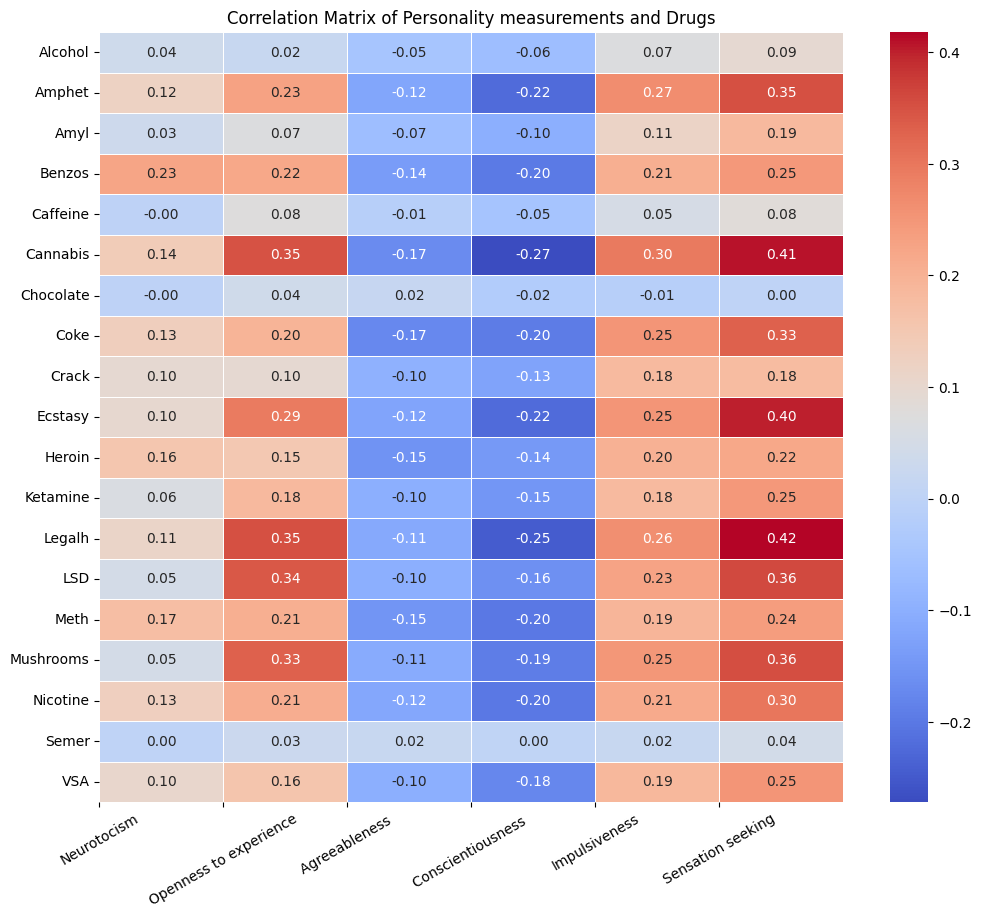

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
# If not, you can read your data into a DataFrame using pd.read_csv or another appropriate method
# For example: df = pd.read_csv('your_dataset.csv')

# Specify the features and drugs you're interested in
features = ['Nscore', 'Oscore', 'Ascore', 'Cscore','Impulsive',	'SS']
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Extract the relevant columns from the DataFrame
selected_columns = features + drugs
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Transpose the correlation matrix
feature_drug_correlations = correlation_matrix.loc[drugs, features]

label_features=['Neurotocism','Openness to experience', 'Agreeableness ', 'Conscientiousness ','Impulsiveness',	'Sensation seeking']
# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(feature_drug_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Personality measurements and Drugs')
plt.xticks(ticks=range(len(label_features)), labels=label_features, rotation=30)
plt.show()
